<a href="https://colab.research.google.com/github/syamsulrizal123/TA_Covid19/blob/main/CNN_normalizedclahegaussian_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
ls

'1101170108 a.razaq galang triansyah no 3.1 tt-41-07.pdf'
'1101170108 arazaq galang ts no2.pdf'
'11101170108 a.razaq galang triansyah no 1 dan 4 tt4107.pdf'
 18281.jpg
 215746.jpg
'215916 (1).jpg'
 215916.jpg
 215917.jpg
 adamCLAHEnewlr-e4/
'a.razaq galang triansyah s-1101170108-no2.jpg'
'a.razaq galang triansyah s-1101170108-no3.jpg'
'a.razaq galang triansyah s._1101170108_tubes kodkom.rar'
 best_weight_vgg16_1.h5
 bw_adam2lr1e-4new.h5
 bw_adam3lr1e-4new.h5
 bw_adamClahe_lr1e-4new.h5
 bw_adamgaussian_lr1e-4new.h5
 bw_adam_lr1e-4new.h5
 Classroom/
'Colab Notebooks'/
 COVID-CTset.zip
 CSV@
'CSV (1)'@
 dataset/
 gaussianClahe/
'Getting started.pdf'
'Meet Recordings'/
'new CLAHE'/
'new clahegaussian'/
 new_datatest/
'new gaussian'/
'new normalisaso'/
 normalized_clahe_gaussian@
 Normalized_data@
'soal 2.jpg'
'Train&Validation.zip'


In [4]:
# import the necessary packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam, SGD, RMSprop, Nadam, Adamax
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage import exposure
import cv2
import pandas as pd
from sklearn.utils import shuffle
import zipfile
import numpy as np
from PIL import Image as pil_image
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install zipfile36


In [ ]:
archive = zipfile.ZipFile('/content/drive/MyDrive/Train&Validation.zip') #Path to the shared data for training and validation
for file in archive.namelist():
     archive.extract(file, '/content/drive/MyDrive/new_datatest') #Extract the data

In [ ]:
cd /content/drive/MyDrive/new_datatest/

/content/drive/MyDrive/new_datatest


In [ ]:
import os, sys
from PIL import Image

size=(224,224)
for infile in os.listdir():
    outfile=os.path.splitext(infile)[0]
    try:
        with Image.open(infile) as im:
  
             array=np.array(im)
            gausfilter = gaussian(array, sigma=1, mode='constant', cval=0.0)
            im = pil_image.fromarray(gausfilter)
            im.convert('RGB')
            im.thumbnail(size)
           im.save("/content/drive/MyDrive/new gaussian/" + infile, "TIFF")
    except OSError:
        pass
print("ok")

IndentationError: ignored

In [ ]:
cd /content/drive/MyDrive/new gaussian/

/content/drive/MyDrive/new gaussian


In [ ]:
size=(224,224)

for infile in os.listdir():
    outfile=os.path.splitext(infile)[0]
    try:
        with Image.open(infile) as im:
            
            array=np.array(im)
            gausfilter = gaussian(array, sigma=1, mode='constant', cval=0.0)
            im = pil_image.fromarray(gausfilter)
            im.convert('RGB')
            im.thumbnail(size)
            im.save("/content/drive/MyDrive/new gaussian/" + infile, "TIFF")
    except OSError:
        pass
print("ok")

ok


In [ ]:
size=(224,224)

for infile in os.listdir():
    outfile=os.path.splitext(infile)[0]
    try:
        with Image.open(infile) as im:
            
            array=np.array(im)/255
            clahe = exposure.equalize_adapthist(array)
            im = pil_image.fromarray(clahe)
            im.convert('RGB')
            im.thumbnail(size)
            im.save("//content/drive/MyDrive/new clahegaussian/" + infile, "TIFF")
    except OSError:
        pass
print("ok")

ok


In [5]:
fold_num=1 #Select Fold Number

In [6]:
train_datagen = ImageDataGenerator()#horizontal_flip=True,vertical_flip=True,zoom_range=0.05,rotation_range=360,width_shift_range=0.05,height_shift_range=0.05,shear_range=0.05)
test_datagen = ImageDataGenerator()
train_df =pd.read_csv('/content/drive/MyDrive/CSV/train{}.csv'.format(fold_num)) #raed train csv file
validation_df = pd.read_csv('/content/drive/MyDrive/CSV/validation{}.csv'.format(fold_num)) #raed validation csv file (Validation in the training process)
train_df = shuffle(train_df) #Shuffle the train data
test_df = pd.read_csv('/content/drive/MyDrive/CSV/test{}.csv'.format(fold_num))#raed test csv file (For evaluating the final version of th

In [7]:
# generating one row 
train_df = train_df.sample(n =1900, random_state=1)
    
# display
train_df

,filename,class
2826,normal1_patient180_SR_2_IM00039.tif,normal
327,137covid_patient69_SR_2_IM00009.tif,covid
3298,normal4_patient176_SR_2_IM00032.tif,normal
3419,normal4_patient185_SR_2_IM00019.tif,normal
1227,157covid_patient133_SR_3_IM00023.tif,covid
...,...,...
441,137covid_patient81_SR_2_IM00022.tif,covid
1025,137covid_patient78_SR_3_IM00029.tif,covid
2641,normal1_patient174_SR_2_IM00013.tif,normal
3543,normal4_patient189_SR_2_IM00015.tif,normal


In [8]:
train_df.groupby('class').count()

,filename
class,
covid,924
normal,976


In [9]:

# generating one row
validation_df = validation_df.sample(n = 475, random_state = 1)
    
# display
validation_df

,filename,class
191,137covid_patient105_SR_3_IM00020.tif,covid
832,normal2_patient314_SR_2_IM00033.tif,normal
111,137covid_patient120_SR_2_IM00022.tif,covid
262,137covid_patient120_SR_3_IM00025.tif,covid
670,normal5_patient226_SR_2_IM00024.tif,normal
...,...,...
865,normalcd1_patient412_SR_2_IM00032.tif,normal
304,137covid_patient18_SR_3_IM00013.tif,covid
200,137covid_patient10_SR_3_IM00016.tif,covid
394,137covid_patient118_SR_4_IM00010.tif,covid


In [10]:
validation_df.groupby('class').count()

,filename
class,
covid,244
normal,231


In [11]:
test_df = test_df.drop(test_df[test_df['class']=='normal'].sample(frac =.94).index)

In [12]:
# generating one row
test_df = test_df.sample(n =200, random_state=1)
    
# display
test_df

,filename,class
363,137covid_patient115_SR_4_IM00004.tif,covid
41,137covid_patient10_SR_2_IM00024.tif,covid
6850,normal5_patient383_SR_2_IM00029.tif,normal
1847,normal1_patient244_SR_2_IM00015.tif,normal
35,137covid_patient10_SR_2_IM00015.tif,covid
...,...,...
5249,normal4_patient208_SR_2_IM00033.tif,normal
354,137covid_patient105_SR_4_IM00121.tif,covid
6496,normal4_patient377_SR_2_IM00005.tif,normal
241,137covid_patient118_SR_3_IM00014.tif,covid


In [13]:

test_df.groupby('class').count()

,filename
class,
covid,93
normal,107


In [14]:
shape=(224,224,3) #shape of the dataset images (in TIFF format)

In [15]:
#Create the generators
train_generator = train_datagen.flow_from_dataframe(
      dataframe=train_df,
      directory='/content/drive/MyDrive/new clahegaussian/',
      x_col="filename",
      y_col="class",
      target_size=shape[:2],
      batch_size=32,
      class_mode='categorical',color_mode="rgb",shuffle=True)
validation_generator = test_datagen.flow_from_dataframe(
        dataframe=validation_df,
        directory='/content/drive/MyDrive/new clahegaussian/',
        x_col="filename",
        y_col="class",
        target_size=shape[:2],
        batch_size=32,
        class_mode='categorical',color_mode="rgb",shuffle=True)
test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory='/content/drive/MyDrive/new clahegaussian/',
        x_col="filename",
        y_col="class",
        target_size=shape[:2],
        batch_size=32,
        class_mode='categorical',color_mode="rgb",shuffle=True)

Found 1900 validated image filenames belonging to 2 classes.
Found 475 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [ ]:
data = []
for num,img_name in enumerate(train_generator.filenames): #load image
    # gt_ind=test_generator.classes[num] #get the loaded image class index
    img=cv2.imread(os.path.join('/content/drive/MyDrive/new clahegaussian/',img_name),-1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    data.append(img)

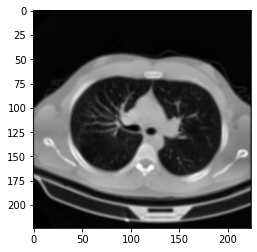

In [ ]:
plt.imshow(data[1])


In [ ]:
data = np.array(data)
data.shape

(1900, 224, 224, 3)

In [ ]:
import cv2

im = cv2.imread('/content/drive/MyDrive/normalized CLAHE/covid/IM00001.tif', -1)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)


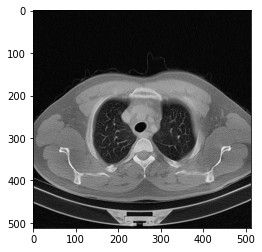

In [ ]:
plt.imshow(im_rgb)


covid


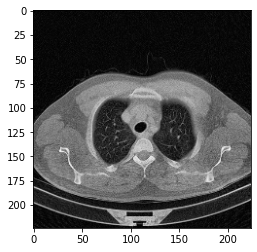

In [ ]:

print(labels[0])
plt.imshow(data[0])

In [ ]:
from sklearn.model_selection import train_test_split
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(train_generator.classes), test_size=0.25)
#trainY = np.asarray(trainY).astype('float32').reshape((-1,1))
#testY = np.asarray(testY).astype('float32').reshape((-1,1))
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(1425, 224, 224, 3)
(475, 224, 224, 3)
(1425,)
(475,)


In [ ]:
print(labels)

['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
labels = encoder.transform(labels)

In [ ]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
print(trainX[4])

[[[0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]
  ...
  [0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]]

 [[0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]
  ...
  [0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]]

 [[0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]
  ...
  [0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]]

 ...

 [[0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]
  ...
  [0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]]

 [[0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]
  [0.0044188 0.0044188 0.0044188]
  ...
  [0.0044188 0.0044188 0.0044188]
  [0

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.regularizers import l2


In [ ]:
base_model = VGG16(include_top=False, input_shape=(224,224,3))
x = base_model.output
x = GlobalMaxPooling2D()(x)
x = Dropout(0.5)(x)
x = BatchNormalization() (x)
x = Dense(4096, activation='relu') (x)
x = Dense(2048, activation='relu') (x)
out = Dense(2, activation='sigmoid') (x)

model = Model(inputs = base_model.input, outputs = out)
model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('bw_adamgaussianclahe1_lr1e-4new.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [ ]:
from keras.optimizers import Adam,SGD,RMSprop,Nadam, Adamax
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(learning_rate=1e-4, decay=1e-6)

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es, checkpoint])

[INFO] training network...
Epoch 1/50
45/45 [==============================] - 24s 488ms/step - loss: 0.5910 - accuracy: 0.6661 - val_loss: 0.4044 - val_accuracy: 0.8842

Epoch 00001: val_accuracy improved from -inf to 0.88421, saving model to bw_adamgaussianclahe1_lr1e-4new.h5
Epoch 2/50
45/45 [==============================] - 21s 476ms/step - loss: 0.4365 - accuracy: 0.7972 - val_loss: 1.2704 - val_accuracy: 0.7179

Epoch 00002: val_accuracy did not improve from 0.88421
Epoch 3/50
45/45 [==============================] - 21s 467ms/step - loss: 0.2793 - accuracy: 0.8833 - val_loss: 0.5880 - val_accuracy: 0.7326

Epoch 00003: val_accuracy did not improve from 0.88421
Epoch 4/50
45/45 [==============================] - 21s 463ms/step - loss: 0.1686 - accuracy: 0.9340 - val_loss: 0.1331 - val_accuracy: 0.9474

Epoch 00004: val_accuracy improved from 0.88421 to 0.94737, saving model to bw_adamgaussianclahe1_lr1e-4new.h5
Epoch 5/50
45/45 [==============================] - 21s 466ms/step -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


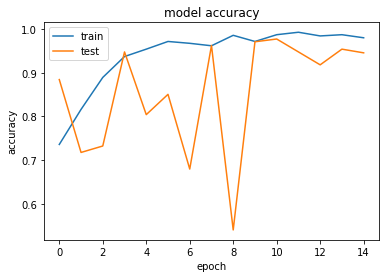

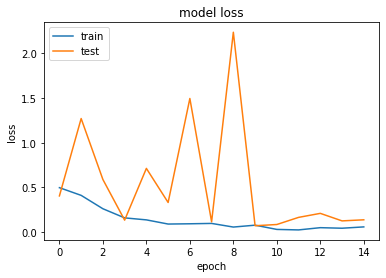

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(testX, batch_size=32)


In [ ]:
print(predictions.argmax(axis=1))


[0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1
 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1
 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1
 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0
 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1
 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY,predictions.argmax(axis=1),target_names = train_generator.class_indices))

              precision    recall  f1-score   support

       covid       0.98      0.96      0.97       242
      normal       0.96      0.98      0.97       233

    accuracy                           0.97       475
   macro avg       0.97      0.97      0.97       475
weighted avg       0.97      0.97      0.97       475



In [ ]:
cf_matrix = confusion_matrix(testY,predictions.argmax(axis=1))
print(cf_matrix)

[[233   9]
 [  5 228]]


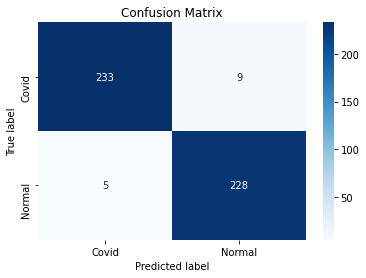

In [ ]:
cm = cf_matrix
import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot();
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
# labels, title and ticks
ax.set_xlabel('Predicted label');ax.set_ylabel('True label'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Covid','Normal']); 
ax.yaxis.set_ticklabels(['Covid','Normal']);

In [ ]:
model.save('gaussianCLahe')

INFO:tensorflow:Assets written to: gaussianCLahe/assets


In [ ]:
data2 = []
for num,img_name in enumerate(test_generator.filenames): #load image
    # gt_ind=test_generator.classes[num] #get the loaded image class index
    img=cv2.imread(os.path.join('/content/drive/MyDrive/new clahegaussian/',img_name),-1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    data2.append(img)

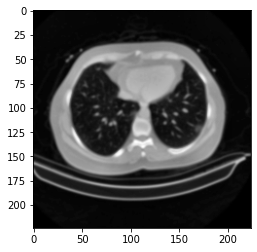

In [ ]:
plt.imshow(data2[1])


In [ ]:

valX, valY = np.array(data2), np.array(test_generator.classes)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
predictions = model.predict(valX, batch_size=32)
print(classification_report(valY,predictions.argmax(axis=1),target_names = test_generator.class_indices))

              precision    recall  f1-score   support

       covid       0.94      0.85      0.89        93
      normal       0.88      0.95      0.91       107

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200



In [ ]:
cf_matrix = confusion_matrix(valY,predictions.argmax(axis=1))
print(cf_matrix)

[[ 79  14]
 [  5 102]]


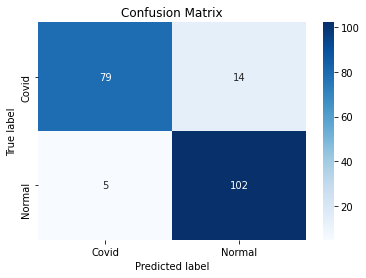

In [ ]:
cm = cf_matrix

import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot();
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
# labels, title and ticks
ax.set_xlabel('Predicted label');ax.set_ylabel('True label'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Covid','Normal']); 
ax.yaxis.set_ticklabels(['Covid','Normal']);

In [ ]:
print("Evaluate on test data")
results = model.evaluate(valX, valY, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
7/7 [==============================] - 1s 119ms/step - loss: 0.3755 - accuracy: 0.9050
test loss, test acc: [0.3755171298980713, 0.9049999713897705]


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/adamCLAHEnewlr-e4')

In [ ]:
import io 
path='/content/drive/MyDrive/testing/covid/IM00027.tif'
save_path='/content/drive/MyDrive/hasil test/covid4.tif'
with open(path, 'rb') as f:
    tif = Image.open(io.BytesIO(f.read()))
array=np.array(tif)
max_val=np.amax(array)
normalized=(array/max_val)
im = Image.fromarray(normalized)
im.save(save_path,'TIFF')

In [ ]:
width = 224
height = 224
dsize = (width, height)
image_testing = cv2.imread('/content/drive/MyDrive/hasil test/normal2.tif', -1)
image_testing = cv2.cvtColor(image_testing, cv2.COLOR_BGR2RGB)
image_testing = cv2.resize(image_testing,dsize)
image_testing = np.array(image_testing)
image_testing.shape

(224, 224, 3)

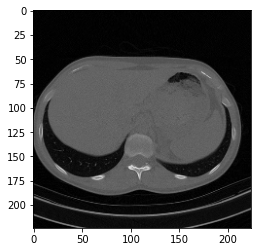

In [ ]:
plt.imshow(image_testing)


In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 224, 224, 3)


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/adamgaussianlr-e4')

In [ ]:

output = model.predict(image_testing, 1)
print(output)
print(encoder.classes_[output.argmax(axis=1)])

[[0.02415034 0.9743716 ]]


NameError: ignored